---

[//]: # "Header"

<p style="text-align: left;  font-size:18pt; LINE-HEIGHT:30px;">
    <span style="float: left">
     Technische Hochschule Ingolstadt<br>
     Prof. Dr. Sören Gröttrup, Laura Dietl
    </span>
    <span style="float: right;">
       Machine Learning 1<br>
        <span style="float: right;">WS 24/25</span>
    </span>
</p>

[//]: # "Header Aufgabenblatt"
<br>
<p style="text-align: center;  font-size:18pt; LINE-HEIGHT:30px;">
     <span style="font-weight: bold;">Aufgabenblatt 3</span><br>
     Themen: Cross-Validation, Overfitting, Normalisierung, Einführung in PyTorch<br>
     Abgabetermin: 17.11.24, 23:59 Uhr <br>
     Punkte: <font color='red'>19,5 (+2,5)</font> / 32 (+4)
</p>


---

**Namen:** Elkhan Alimatov (ela0016), Mazen Zidan (maz4669) , Hamdah Mariyam (ham2119)

---

# 1. K-fold Cross-Validation


### Cross-Validation Funktionen in sklearn 
Python stellt einige Funktionen für die Cross-Validation zur Verfügung, welche in der Bibliothek `sklearn.model_selection` zu finden sind. Insbesondere die folgenden Funktionen sind dabei hilfreich:

1. `KFold`
1. `cross_validate`
1. `cross_val_score`

Genaue Informationen finden Sie auf der Seite https://scikit-learn.org. Einige Funktionen geben einen Evaluationsscore zurück. Schauen Sie auch nach, wie Sie den Standard-Rückgabe-Score ändern können, z.B. in den RMSE.

### Daten
Der Datensatz `Ozone.csv` enthält meterologische Daten und die Konzentration von Ozone (O3) in der Luft im Raum Los Angeles. Die folgende Tabelle zeigt die Beschreibung der Variablen.

|Name of variable| Description|
| --- | --- |
|O3| Daily maximum of the hourly average ozone concentration|
|Vh| 500 millibar pressure height|
|Wind| Wind speed in mph|
|Humidity| Humidity in percent|
|Temp| Temperature in degrees Fahrenheit|
|Ibh| Temperature inversion base height in feet|
|Dpg| Pressure gradient in mm Hg|
|Ibt| Inversion base temperature in degrees Fahrenheit|
|Vis| Visibility|
|Day| Day of year|

**Daten laden**

In [1]:
## Packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Import data
data = pd.read_csv("C:/Users/hmari/Desktop/THI_KI/S3/ML1/praktikum/Augabenblatt 3/Daten Blatt 3/Ozone.csv")
data

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,3,5710,4,28,40,2693,-25,87,250,33
1,5,5700,3,37,45,590,-24,128,100,34
2,5,5760,3,51,54,1450,25,139,60,35
3,6,5720,4,69,35,1568,15,121,60,36
4,4,5790,6,19,45,2631,-33,123,100,37
...,...,...,...,...,...,...,...,...,...,...
325,8,5630,4,50,50,2851,-5,100,70,384
326,2,5730,3,53,51,111,-14,225,200,387
327,3,5690,3,23,51,5000,-36,107,70,388
328,5,5650,3,61,50,3704,18,83,40,389


In [3]:
data.describe()

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,11.775758,5750.484848,4.848485,58.130303,61.754545,2572.875758,17.369697,161.160606,124.533333,209.424242
std,8.011277,105.708241,2.116963,19.865000,14.458737,1803.885870,35.717181,76.679424,79.362393,104.376374
min,1.000000,5320.000000,0.000000,19.000000,25.000000,111.000000,-69.000000,-25.000000,0.000000,33.000000
25%,5.000000,5690.000000,3.000000,47.000000,51.000000,877.500000,-9.000000,107.000000,70.000000,120.250000
50%,10.000000,5760.000000,5.000000,64.000000,62.000000,2112.500000,24.000000,167.500000,120.000000,205.500000
75%,17.000000,5830.000000,6.000000,73.000000,72.000000,5000.000000,44.750000,214.000000,150.000000,301.750000
max,38.000000,5950.000000,11.000000,93.000000,93.000000,5000.000000,107.000000,332.000000,350.000000,390.000000


In [4]:
# get Featur-Matrix and Target Variable
X = data.drop(columns=("O3"))
y = data["O3"]

## Aufgabe 1.1 (Lineare Regression mittels K-fold X-Validation) [10 Punkte] <font color='red'>[7 Punkte]</font>

1.  Führen Sie folgenden Code aus. Beschreiben Sie was die einzelnen Zeilen Code machen und deren Ergebnis. _Hinweis:_ Ermitteln Sie die Dimension von `X_train`, `X_test`, etc.

```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
```

2. Trainieren Sie ein lineares Regressionsmodell auf den in 1. generierten Trainignsdaten. Berechnen Sie dann den RMSE für den Trainings und Testdatensatz.
2. Erstellen Sie nun ein lineares Regressionsmodell mittels 10-facher Kreuzvalidierung, was aus den meterologischen Daten die Ozone-Konzentration in der Luft schätzt. Sie können dafür die oben angegebenen Funktionen `KFold`, `cross_validate` oder `cross_val_score` nutzen. Verwenden Sie als Gütemaß den _Root Mean Squared Error (RMSE)_.
2. Was ist der RMSE für das in 3. trainierte Modell auf dem Trainings- und auf dem Testdatensatz? Und vergleichen Sie das Ergebnis mit dem RMSE aus Teil 2.

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.metrics import mean_squared_error
import math

### Lösung Aufgabe 1.1

In [108]:
# Teil 1
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Dimensions
print("X_train:", X_train.shape, 
      " X_test:",X_test.shape,
      " y_train:",y_train.shape,
      " y_test:",y_test.shape)

X_train: (264, 9)  X_test: (66, 9)  y_train: (264,)  y_test: (66,)


In [109]:
# Teil 2
# Train a linear regression model on the training data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on both training and testing sets
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Calculate RMSE for training and testing sets
rmse_train = math.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = math.sqrt(mean_squared_error(y_test, y_test_pred))

print("Training RMSE: ",rmse_train)
print("Test RMSE: ",rmse_test)

Training RMSE:  4.146773431044413
Test RMSE:  5.291577978960028


In [110]:
# Teil 3
# Perform 10-fold cross-validation and calculate RMSE for each fold
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse = [math.sqrt(-score) for score in cv_scores]

cv_rmse

[4.351901896423391,
 3.9716021000444823,
 3.6548595489876723,
 4.786566903694034,
 4.105093315880854,
 4.470256282961821,
 4.163568693383782,
 3.2916060851939672,
 4.732674849370232,
 5.17847018335439]

In [111]:
# Teil 4a
from sklearn.model_selection import cross_val_predict

# Perform 10-fold cross-validation to get predictions for training data
train_cv_pred = cross_val_predict(linear_model, X_train, y_train, cv=10)

# Calculate RMSE on the cross-validated predictions for the training data
rmse_train_cv = math.sqrt(mean_squared_error(y_train, train_cv_pred))

# Calculate RMSE on the test set predictions using the model trained on full training set
rmse_test_cv = math.sqrt(mean_squared_error(y_test, y_test_pred))

print("CV-Training RMSE:",rmse_train_cv,
      "  CV-Test RMSE:", rmse_test_cv)


CV-Training RMSE: 4.302141784633056   CV-Test RMSE: 5.291577978960028


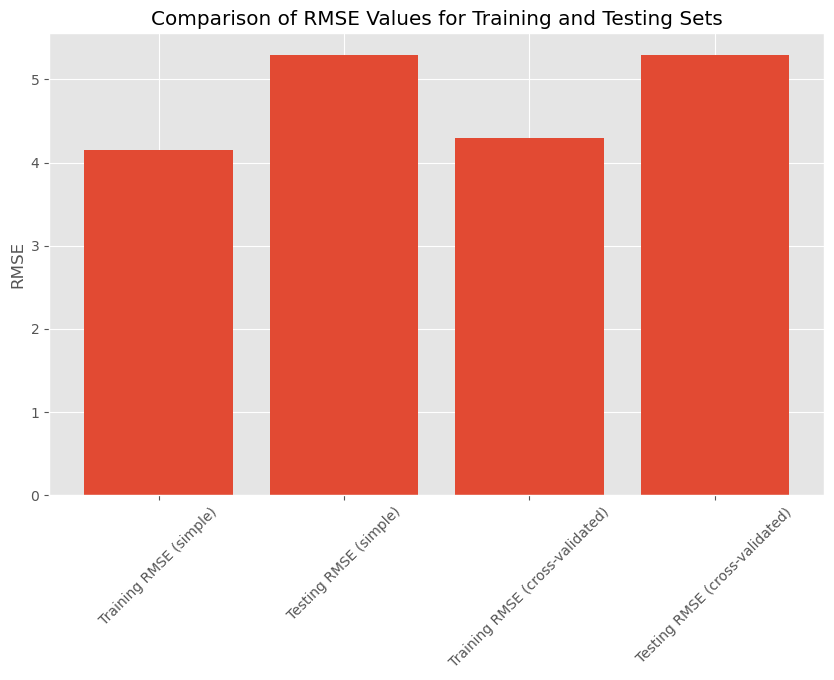

In [112]:
# Teil 4b
# RMSE values to plot
rmse_values = {
    'Training RMSE (simple)': 4.15,
    'Testing RMSE (simple)': 5.29,
    'Training RMSE (cross-validated)': 4.30,
    'Testing RMSE (cross-validated)': 5.29
}

# Plot the RMSE values for comparison
plt.figure(figsize=(10, 6))
plt.bar(rmse_values.keys(), rmse_values.values())
plt.ylabel('RMSE')
plt.title('Comparison of RMSE Values for Training and Testing Sets')
plt.xticks(rotation=45)
plt.show()


Bei der Kreuzvalidierung ist der RMSE des Trainings (4.30) etwas größer als der RMSE des Trainings (4.15) bei der einfachen linearen Regression.
Aber der Test RMSE ist in beiden Fällen gleich.

<font color='red'>
Anmerkungen zu Aufgabe 1.1:

* Erklärung fehlt
* Teil 4) Sie müssen bei der XVal alle Daten X, y reingeben. Dort werden dann ja Testdaten gezogen und ein Testfehler berechnet. Der Testfehler. den Sie berechnen stammt noch von dem Holdout Split in 2)


</font>


## Aufgabe 1.2 (Finden des optimalen k im kNN) [10 Punkte] <font color='red'>[6 Punkte]</font>

Ziel der Aufgabe ist die Erstellung eines kNN-Regressionsmodells, welches die O3-Konzentration auf Basis der anderen Variablen vorhersagt. Für die Wahl des "besten" Modells müssen Sie den optimalen Hyperparameter `k` bestimmen, welcher die Anzahl an Nachbarn im kNN-Modell angibt. In dieser Aufgabe sollen Sie für die Bestimmung das Cross-Validation Verfahren anwenden.

1. Splitten Sie 20% des Datensatzen als Validierungsdaten ab. Benutzen Sie dafür die Funktion `train_test_split` mit `random_state = 123`. 
1. Trainieren Sie auf den restlichen Daten für jedes $k=1,...,50$ ein k-Nearest Neigbor Modelle mittels 10-facher Kreuzvalidierung.
1. Visualisieren Sie den RMSE für die Trainingsdaten und Testdaten innerhalb der Kreuzvalidierung. Für welche $k$ tritt Overfitting ein?
1. Für welches $k$ zeigt das kNN Modell die beste Güte bezogen auf den RMSE? 
1. Erstellen Sie ein finales Modell, indem Sie für das gefundene $k$ ein kNN auf den ganzen Trainingsdaten erzeugen.
1. Validieren Sie das Modell auf den Validierungsdaten. Ist das gefundene Modell geeignet?

In [115]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import math

### Lösung Aufgabe 1.2

In [117]:
# Teil 1
# Split data (80% train, 20% validation) with random_state=123
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

In [134]:
# Teil 2
# Initialize lists to store RMSE for training and cross-validated test data
train_rmse_list = []
val_rmse_list = []
k_values = range(1, 51)

# Loop over k values from 1 to 50
for k in k_values:
    # Define kNN model with pipeline for scaling and training
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=k))
    ])
    
    # Cross-validation (10-fold) for the training data
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_rmse = math.sqrt(-cv_scores.mean())
    
    # Fit the model on the entire training data and calculate training RMSE
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_rmse = math.sqrt(mean_squared_error(y_train, train_pred))
    
    # Store RMSE values
    train_rmse_list.append(train_rmse)
    val_rmse_list.append(cv_rmse)
print(train_rmse_list, val_rmse_list)
    

[0.0, 2.785072492392036, 3.3657514507584825, 3.442403527399794, 3.608533656697018, 3.6170454347115513, 3.7679584422483776, 3.8449931778715536, 3.9423988151261935, 3.9415617578453706, 3.9579518908835234, 3.9757028527545506, 4.004180731627914, 4.020027071569714, 4.057970085168348, 4.048233984115977, 4.05123907093328, 4.095805981334778, 4.085747020622809, 4.106787157569255, 4.126332296731178, 4.1608593389187005, 4.153476573452223, 4.142493007416949, 4.1714527663415035, 4.18899432804173, 4.203772921998936, 4.224678674478971, 4.2180206489288015, 4.219939740581779, 4.235606635807676, 4.243405698394247, 4.26303737153831, 4.275404936405699, 4.284237480042986, 4.289813188725572, 4.323879289650979, 4.3318607702382295, 4.348421798715181, 4.3648735619856405, 4.386760289488637, 4.40978565742416, 4.419991390641073, 4.435031195618661, 4.459407681792278, 4.459719802735293, 4.4800733756182956, 4.499160545591168, 4.503966330701063, 4.530726913381159] [5.574808519446209, 5.10312805585123, 4.7479106882677

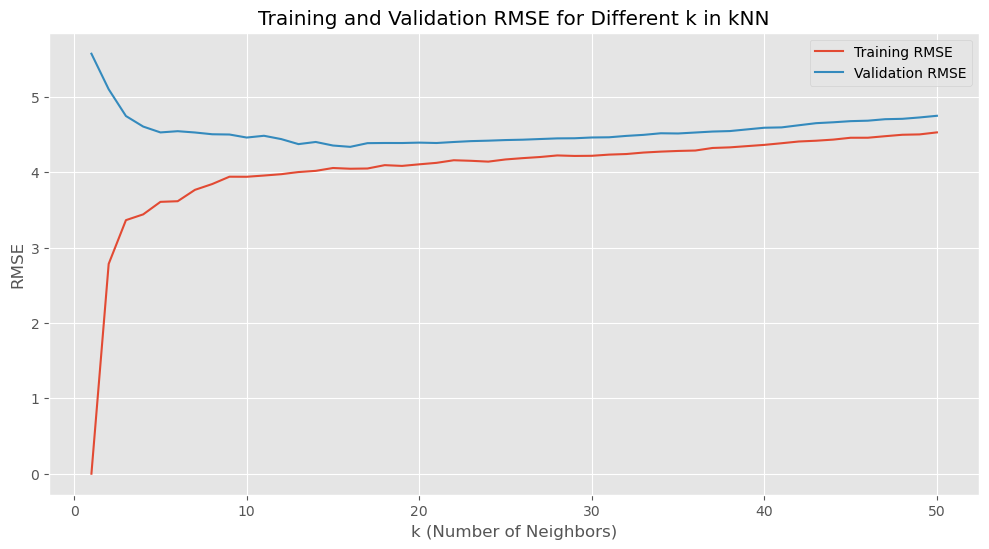

In [119]:
# Teil 3
# Plotting the RMSE values for each k to analyze overfitting and find optimal k
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_rmse_list, label='Training RMSE')
plt.plot(k_values, val_rmse_list, label='Validation RMSE')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE for Different k in kNN')
plt.legend()
plt.show()

# Teil 4
Der Punkt, an dem der Validierungs-RMSE minimiert wird (etwa k=12), ist eine gute Wahl für das optimale k,
da er den besten Kompromiss zwischen Bias und Varianz darstellt. So die Güte des Modells ist also am Punkt k=12 am besten.

In [136]:
# Teil 5
# Set optimal k value (k=12)
optimal_k = 12

# Define final kNN model with scaling and the optimal k
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=optimal_k))
])

# Train the final model on the entire training data
final_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = final_model.predict(X_val)

# Calculate RMSE for the validation set
rmse_val_final = math.sqrt(mean_squared_error(y_val, y_val_pred))
rmse_val_final


4.150169360870195

# Teil 6
Dieser RMSE-Wert für die Validierungsdaten zeigt, dass das Modell gut geeignet ist, die Ozonkonzentration vorherzusagen.

<font color='red'>
Anmerkungen zu Aufgabe 1.1:

* Sie dürfen für den Trainingsfehler nicht ein neues Modell fitten. Nehmen Sie den Trainignsfehler aus der XVal. 
* Sie haben einen StandardScaler genommen. Dies ist erst in Aufgabe 1.3 verlangt. So sind die Ergebnisse nicht mit Aufgabe 1.3 vergleichbar. Auch das optimale k ist ein anderes.
* Wann tritt Overfitting ein?

</font>

## Aufgabe 1.3  [10 Punkte] <font color='red'>[6 Punkte]</font>
1. Betrachten Sie den `Ozone` Datensatz. Was für ein Problem könnte hier beim Training eines Modells auftreten? 
1. Informieren Sie sich über die Funktion `StandardScaler()` im Paket `sklearn.preprocessing`. Welche Transformation der Features führt diese aus? 
1. Führen Sie wie in der Aufgabe davor eine 10-fache kreuzvalidierung durch, zur Bestimmung des optimalen $k=1,...,50$ für ein k-Nearest Neighbor Modell, jedoch für skalierte Feature. Sie können dabei den gleichen Validierungsdatensatz wie in der vorherigen Aufgabe verwenden. Berechnen Sie auch hier jeweils den RMSE. Welches $k$ ist in diesem Fall optimal?
1. Trainieren Sie wieder ein finales Modell auf allen Trainignsdaten für das von Ihnen gefundenen optimale $k$ und validieren Sie dieses auf dem Validierungsdatensatz. Vergleichen Sie das Ergebnis mit dem aus der vorherigen Aufgabe.

_Hinweise:_ 
* Achten Sie darauf, dass Sie bei der Erstellung der Modelle in der Kreuzvalidierung Training und Test sauber trennen. Dies gilt auch insbesondere für die Skalierung! 
* Machen Sie sich also Gedanken über die Reihenfolde der einzelnen Schritte, bevor Sie den Algorithmus implementieren.
* Die Funktion `Pipeline` in `sklearn.pipeline` kann hier sehr nützlich sein.

### Lösung Aufgabe 1.3

# Teil 1
Feature - Skalierung: Einige Merkmale haben sehr unterschiedliche Wertebereiche. Dies kann dazu führen, dass ein Modell wie kNN, 
das auf Distanzen basiert, gegenüber größeren Wertebereichen verzerrt ist.

# Teil 2
StandardScaler ist eine Vorverarbeitungstechnik in scikit-learn, die die Verteilung jedes Merkmals so transformiert, 
dass der Mittelwert Null und die Standardabweichung Eins ist.
Dies sorgt dafür, dass alle Merkmale im gleichen Wertebereich liegen, was insbesondere bei kNN nützlich ist, da es auf Distanzen basiert.

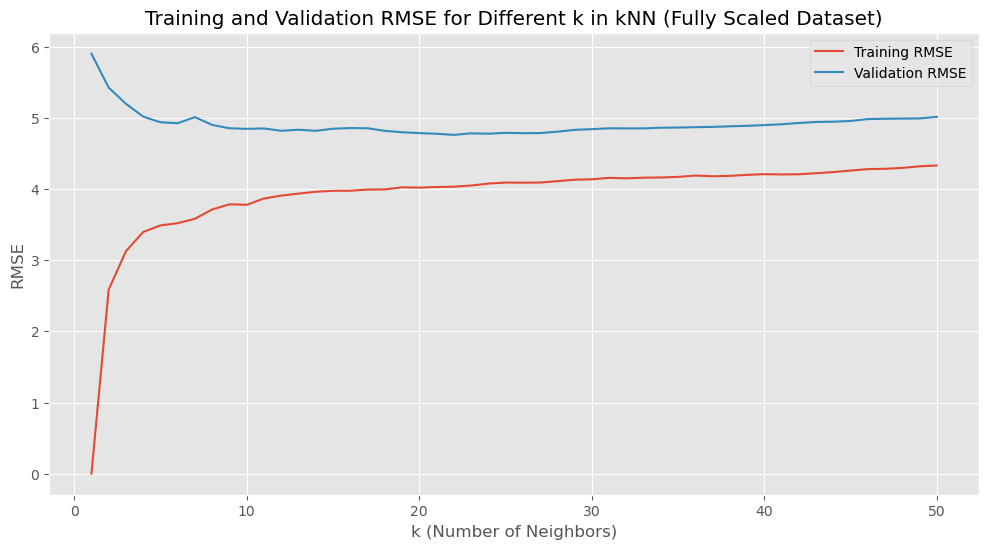

In [138]:
# Teil 3
# Scale the entire dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists to store RMSE for training and cross-validated test data
train_rmse_list = []
val_rmse_list = []
k_values = range(1, 51)

# Loop over k values from 1 to 50 and perform 10-fold cross-validation
for k in k_values:
    # Define kNN model with the optimal k without re-scaling
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Cross-validation (10-fold) on the already scaled dataset
    cv_scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
    cv_rmse = math.sqrt(-cv_scores.mean())
    
    # Fit the model on the entire scaled dataset and calculate training RMSE
    knn.fit(X_scaled, y)
    train_pred = knn.predict(X_scaled)
    train_rmse = math.sqrt(mean_squared_error(y, train_pred))
    
    # Store RMSE values
    train_rmse_list.append(train_rmse)
    val_rmse_list.append(cv_rmse)

# Plotting the RMSE values for each k to analyze overfitting and find optimal k
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_rmse_list, label='Training RMSE')
plt.plot(k_values, val_rmse_list, label='Validation RMSE')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE for Different k in kNN (Fully Scaled Dataset)')
plt.legend()
plt.show()

In [140]:
# Teil 4
# Set optimal k value based on analysis (k=14)
optimal_k = 14

# Define final kNN model with the chosen k without re-scaling (since the dataset is already scaled)
final_knn_model = KNeighborsRegressor(n_neighbors=optimal_k)

# Fit the model on the entire scaled dataset
final_knn_model.fit(X_scaled, y)

# Since we do not have a separate test/validation set here due to using the entire dataset for scaling,
# the model's generalization would be confirmed by its cross-validated score rather than a new validation set.
# For a final test, we might ideally apply it to an external dataset.

# Validate model using cross-validated RMSE as final check
final_cv_scores = cross_val_score(final_knn_model, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
final_cv_rmse = math.sqrt(-final_cv_scores.mean())

final_cv_rmse


4.817422578189089

<font color='red'>
Anmerkungen zu Aufgabe 1.3:

* Sie dürfen nicht die gesamte Featurematrix skalieren. Sie müssen den Scaler nur auf den Trainingsdaten fitten und dann auf die Testdaten anwenden!

* Sie sollten erst einen Validierungsdatensatz abspalten und auf den restlichen Daten eine XVal durchnehmen. Wie Sie es gemacht haben, können Sie nicht korrekt validieren, ob Sie nicht in der Wahl des k einen Bias haben.

</font>



# 2. Bootstrapverfahren

## Aufgabe 2.1 [2 Punkte] <font color='red'>[0,5 Punkte]</font>

Sei $B$ die Anzahl an Bootstrap Datensätzen. In der Vorlesung wurde gesagt, dass sich für großes $B$ das Bootstrap-Verfahren so verhält wie eine Leave-one-out CV. Geben Sie dafür eine Begründung an.

### Antwort zu Aufgabe 2.1
Für großes ( B ) nähert sich das Bootstrap-Verfahren der Leave-One-Out Cross-Validation an, weil, die Varianz der Bootstrap-Schätzungen wird für großes ( B ) klein, was zu stabilen und verlässlichen Schätzungen führt.


<font color='red'>
Anmerkungen zu Aufgabe 2.1:

* Zu ungenau

</font>


# 3. Einführung in  Pytorch

In den nächsten Aufgabenblättern werden wir PyTorch verwenden, um Neuronale Netze zu trainieren. Dieser Abschnitt dient dazu sich selbstständig mit PyTorch vertraut zu machen.

## Aufgabe 3.1 [0 Punkte]

Beschäftigen Sie sich mit Pytorch, in dem Sie z.B. einige der folgenden Tutorien durchspielen.

**Tutorien:**

* https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

* https://cs230.stanford.edu/blog/pytorch/

* https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e

## Aufgabe 3.2 [0 Punkte]

Im unten liegenden Code wird eine Lineare Regression auf dem Datensatz `Ozone` zur Vorhersage von `O3` in PyTorch trainiert. Schauen Sie sich den Code an und versuchen Sie die einzelnen Schritte nachzuvollziehen.

In [5]:
## load Packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as net
import torch.nn.functional as F
import torch.optim as optim

%matplotlib inline
plt.style.use('ggplot')

**Preprocessing**

In [6]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)

In [7]:
# Scale Variables (StandardScaler)
sc = StandardScaler()

# fit & transform scaler
X_train = sc.fit_transform(X_train)

# apply scaler to test set
X_test = sc.transform(X_test)

In [8]:
X_train

array([[-0.3615906 , -0.42723728, -2.00432731, ..., -0.90802897,
         2.20163518,  1.73683713],
       [ 1.03811494, -0.42723728,  0.63402779, ..., -0.00425478,
        -0.93710382,  0.74442321],
       [ 0.85148754,  0.03313269, -2.00432731, ...,  0.163589  ,
         0.94613958, -1.58774949],
       ...,
       [ 0.38491902,  1.41424259,  1.09066617, ..., -0.86929579,
        -0.0582569 ,  0.88336116],
       [ 1.31805605,  0.03313269, -2.00432731, ...,  0.47345443,
        -0.56045514,  1.00245083],
       [ 1.03811494, -0.88760725,  0.2788646 , ...,  0.75749775,
        -1.35141737, -0.10905276]])

In [9]:
## To Tensor
x_train_ts = torch.tensor(X_train, dtype=torch.float)
x_test_ts = torch.tensor(X_test, dtype=torch.float)

y_train_ts = torch.tensor(y_train.to_numpy(), dtype=torch.float).view(-1,1)
y_test_ts = torch.tensor(y_test.to_numpy(), dtype=torch.float).view(-1,1)

In [10]:
x_train_ts.shape, y_train_ts.shape

(torch.Size([264, 9]), torch.Size([264, 1]))

**Define Hyper-Parameter, Model and Optimizer**

In [11]:
# Define Hyper-Parameters
n_iterations = 40
learning_rate = 0.05

random_seed = 12
torch.manual_seed(random_seed)

In [12]:
# Definition of the linear regression model
class LinReg(net.Module):
    def __init__(self):
        super(LinReg, self).__init__()
        self.linear = net.Linear(9, 1)

    def forward(self, x):
        x = self.linear(x)
        return x

In [13]:
# Initialize Linear Regression & Optimizer (Gradient Descent)
linear_regression = LinReg()
optimizer = optim.SGD(linear_regression.parameters(), lr=learning_rate)

**Run Training**

In [14]:
# Define variable to save the loss for each iteration
train_losses = []
test_losses = []

In [15]:
# Run Training
# Performe Parameter-Update in every Iteration via Gradient Descent

for epoch in range(1, n_iterations + 1):
    
    # --- Training ----#
    optimizer.zero_grad()                           # Gradienten der parameter werden auf 0 gesetzt
    y_pred = linear_regression(x_train_ts)          # Prediction
    train_loss = F.mse_loss(y_pred, y_train_ts)    # Calc loss
    train_loss.backward()                           # Calc gradients / Backpropagation
    optimizer.step()                                 # Update parameter: w = w - learning_rate * grad
     
    
    # ----- Evaluation metrics train ---- #
    train_losses.append(np.sqrt(train_loss.item()))
    
    # ----- Test Prediction & Evaluation -------------#
    y_test_pred = linear_regression(x_test_ts)
    
    # Loss
    test_loss = F.mse_loss(y_test_pred, y_test_ts)
    test_losses.append(np.sqrt(test_loss.item()))
    
    # Print Validation criteria
    print(f'''Iteration {epoch}, Train set - loss: {round(np.sqrt(train_loss.item()), 3)} | Test set - Loss: {round(np.sqrt(test_loss.item()), 3)}''')

Iteration 1, Train set - loss: 14.136 | Test set - Loss: 11.78
Iteration 2, Train set - loss: 12.302 | Test set - Loss: 10.525
Iteration 3, Train set - loss: 10.974 | Test set - Loss: 9.559
Iteration 4, Train set - loss: 9.94 | Test set - Loss: 8.776
Iteration 5, Train set - loss: 9.096 | Test set - Loss: 8.121
Iteration 6, Train set - loss: 8.385 | Test set - Loss: 7.563
Iteration 7, Train set - loss: 7.778 | Test set - Loss: 7.086
Iteration 8, Train set - loss: 7.257 | Test set - Loss: 6.677
Iteration 9, Train set - loss: 6.81 | Test set - Loss: 6.328
Iteration 10, Train set - loss: 6.427 | Test set - Loss: 6.031
Iteration 11, Train set - loss: 6.1 | Test set - Loss: 5.78
Iteration 12, Train set - loss: 5.821 | Test set - Loss: 5.568
Iteration 13, Train set - loss: 5.585 | Test set - Loss: 5.391
Iteration 14, Train set - loss: 5.386 | Test set - Loss: 5.243
Iteration 15, Train set - loss: 5.219 | Test set - Loss: 5.12
Iteration 16, Train set - loss: 5.079 | Test set - Loss: 5.019
Ite

**Visualize Training Process**

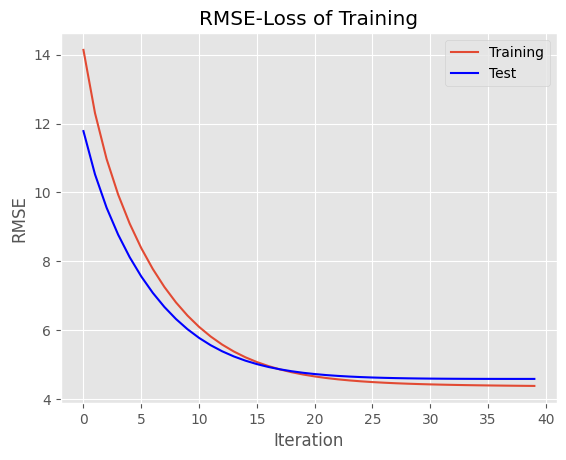

In [16]:
# Visualize Training process
plt.plot(train_losses, label="Training")
plt.plot(test_losses, c='blue', label="Test")
plt.title("RMSE-Loss of Training")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.show()

## Aufgabe 3.2 (Zusatzaufgabe) (Logistische Regression in PyTorch) [4 Punkte*] <font color='red'>[2,5 Punkte]</font>
**Diese Punkte sind nicht relevant für die Bestimmung der Bestehensgrenze, können aber von Ihnen als Zusatzpunkte gesammelt werden.**

Der _Wisconsin Breast Cancer_ Datensatz enthält Messwerte von Gewebeproben der Brust, sowie eine Variable `diagnosis`, welche angibt, ob die Gewebeprobe tumorös (1) oder gesund ist (0). Weitere Informationen finden Sie hier: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Schreiben Sie den obigen Code um, so dass Sie eine logistische Regression trainieren, welche basierend auf den Messwerten erkennt, ob eine vorliegnde Gewebeprobe tumorös oder nicht-tumorös ist. Benutzen Sie als Verlustfunktion die Cross-Entropy. Was ist die Accuracy auf den Trainingsdaten? 

### Lösung Aufgabe 3.2

In [17]:
## Load Data
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
cancer = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)
cancer["diagnosis"] = cancer_dataset.target
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [18]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset.data, cancer_dataset.target, test_size = 0.2, random_state=12)

In [19]:
# Scale Variables (StandardScaler)
sc = StandardScaler()

# fit & transform scaler
X_train = sc.fit_transform(X_train)

# apply scaler to test set
X_test = sc.transform(X_test)

In [20]:
## To Tensor
x_train_ts = torch.tensor(X_train, dtype=torch.float)
x_test_ts = torch.tensor(X_test, dtype=torch.float)

y_train_ts = torch.tensor(y_train, dtype=torch.long).view(-1,1)
y_test_ts = torch.tensor(y_test, dtype=torch.long).view(-1,1)

In [21]:
x_train_ts.shape, y_train_ts.shape

(torch.Size([455, 30]), torch.Size([455, 1]))

**Ihr Code ab hier**

In [22]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = net.Linear(30, 1)

    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        return x

In [23]:
log_reg = LogisticRegression()
optimizer = optim.SGD(log_reg.parameters(), lr=0.05)

In [24]:
train_losses_log = []
test_losses_log = []

In [25]:
for epoch in range(1, n_iterations + 1):
    
    # --- Training ----#
    optimizer.zero_grad()                          
    y_pred = log_reg(x_train_ts)                    
    train_loss = F.binary_cross_entropy(y_pred, y_train_ts.float())   
    train_loss.backward()
    optimizer.step()                                
    
    
    # ----- Evaluation metrics train ---- #
    train_losses_log.append(np.sqrt(train_loss.item()))
    
    # ----- Test Prediction & Evaluation -------------#
    y_test_pred = log_reg(x_test_ts)
    
    # Loss
    test_loss = F.binary_cross_entropy(y_test_pred, y_test_ts.float())
    test_losses_log.append(np.sqrt(test_loss.item()))
    
    # Print Validation criteria
    print(f'''Iteration {epoch}, Train set - loss: {round(np.sqrt(train_loss.item()), 3)} | Test set - Loss: {round(np.sqrt(test_loss.item()), 3)}''')

Iteration 1, Train set - loss: 0.792 | Test set - Loss: 0.732
Iteration 2, Train set - loss: 0.745 | Test set - Loss: 0.695
Iteration 3, Train set - loss: 0.708 | Test set - Loss: 0.665
Iteration 4, Train set - loss: 0.679 | Test set - Loss: 0.641
Iteration 5, Train set - loss: 0.655 | Test set - Loss: 0.622
Iteration 6, Train set - loss: 0.634 | Test set - Loss: 0.605
Iteration 7, Train set - loss: 0.617 | Test set - Loss: 0.591
Iteration 8, Train set - loss: 0.601 | Test set - Loss: 0.578
Iteration 9, Train set - loss: 0.588 | Test set - Loss: 0.567
Iteration 10, Train set - loss: 0.576 | Test set - Loss: 0.557
Iteration 11, Train set - loss: 0.565 | Test set - Loss: 0.549
Iteration 12, Train set - loss: 0.555 | Test set - Loss: 0.541
Iteration 13, Train set - loss: 0.546 | Test set - Loss: 0.533
Iteration 14, Train set - loss: 0.538 | Test set - Loss: 0.527
Iteration 15, Train set - loss: 0.531 | Test set - Loss: 0.52
Iteration 16, Train set - loss: 0.523 | Test set - Loss: 0.515
It

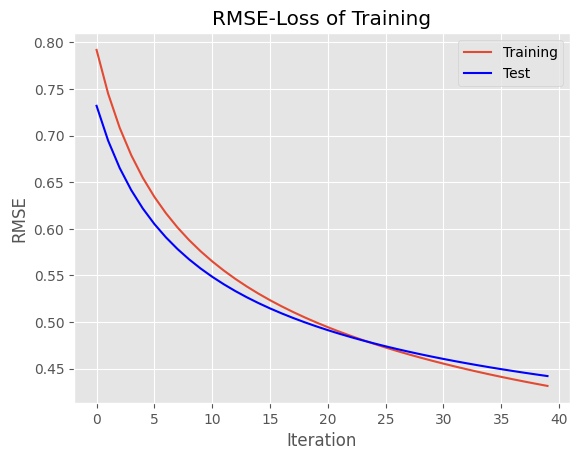

In [26]:
plt.plot(train_losses_log, label="Training")
plt.plot(test_losses_log, c='blue', label="Test")
plt.title("RMSE-Loss of Training")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [27]:
accuracy = (y_test_ts == y_test_pred.argmax(1).view(-1,1)).sum().float() / float(y_test_ts.size(0))
print(f"Accuracy: {accuracy.item()}")


Accuracy: 0.42105263471603394


<font color='red'>
Anmerkungen zu Aufgabe 3.3:

* Sie müssen nicht die Wurzel aus dem Fehler nehmen.
* Das Modell ist noch nicht konvergiert. Evtl. Lernrate erhöhen?

</font>
